In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("../tests/test_results_sep_finetuning.csv")

# Hiển thị thông tin cơ bản
print("Thông tin tổng quan về dữ liệu:")
print(df.info())
print("\nThống kê mô tả:")
print(df.describe())

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   snt_id    301 non-null    object 
 1   sdr       301 non-null    float64
 2   sdr_i     301 non-null    float64
 3   si-snr    301 non-null    float64
 4   si-snr_i  301 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.9+ KB
None

Thống kê mô tả:
              sdr       sdr_i      si-snr    si-snr_i
count  301.000000  301.000000  301.000000  301.000000
mean    20.093641   19.869211   19.583233   19.579297
std      5.576830    5.594534    5.640779    5.637430
min     -1.978049   -2.146761   -3.187560   -3.242761
25%     19.314814   19.102376   18.731859   18.680305
50%     20.842192   20.565678   20.425917   20.436779
75%     22.125103   21.947145   21.704411   21.701777
max     40.370585   40.370758   39.539516   39.539696


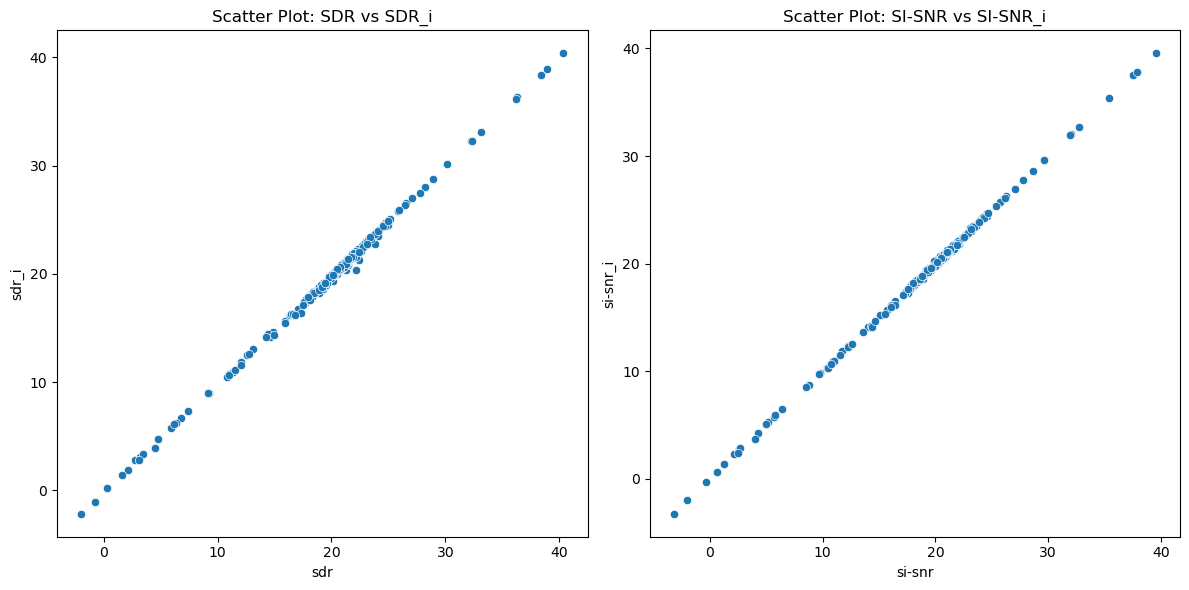

In [86]:
# Biểu đồ phân tán giữa các thông số
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['sdr'], y=df['sdr_i'])
plt.title('Scatter Plot: SDR vs SDR_i')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['si-snr'], y=df['si-snr_i'])
plt.title('Scatter Plot: SI-SNR vs SI-SNR_i')

plt.tight_layout()
plt.show()

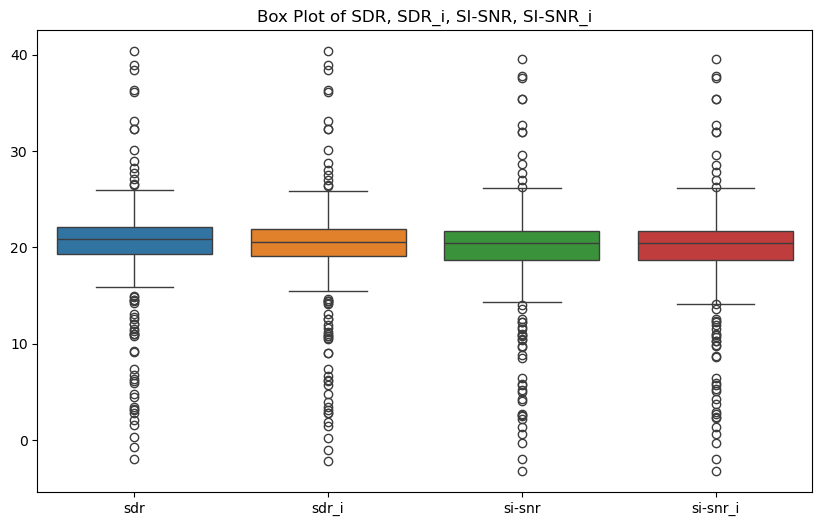

In [87]:
# Biểu đồ hộp (box plot) để xem sự phân bố của từng chỉ số
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sdr', 'sdr_i', 'si-snr', 'si-snr_i']])
plt.title("Box Plot of SDR, SDR_i, SI-SNR, SI-SNR_i")
plt.show()

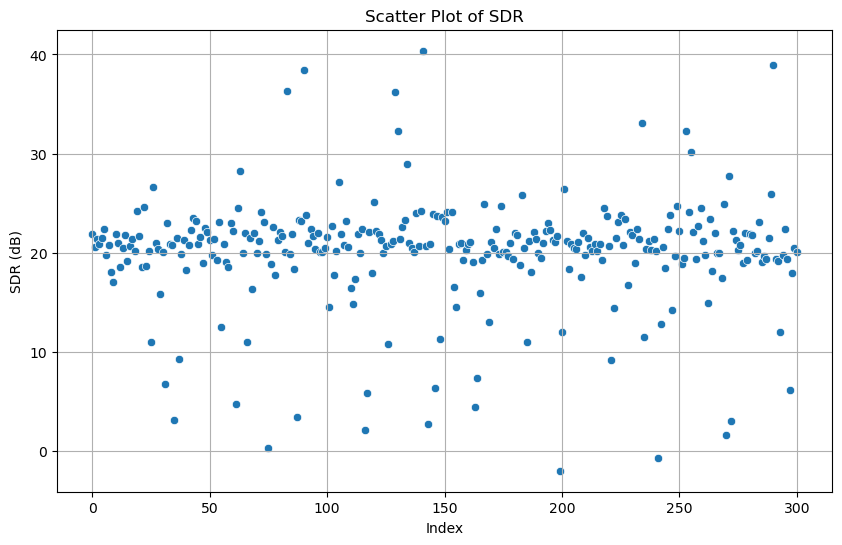

In [88]:
# Vẽ biểu đồ phân tán (scatter plot) cho chỉ số SDR
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['sdr'])
plt.title('Scatter Plot of SDR')
plt.xlabel('Index')
plt.ylabel('SDR (dB)')
plt.grid(True)
plt.show()

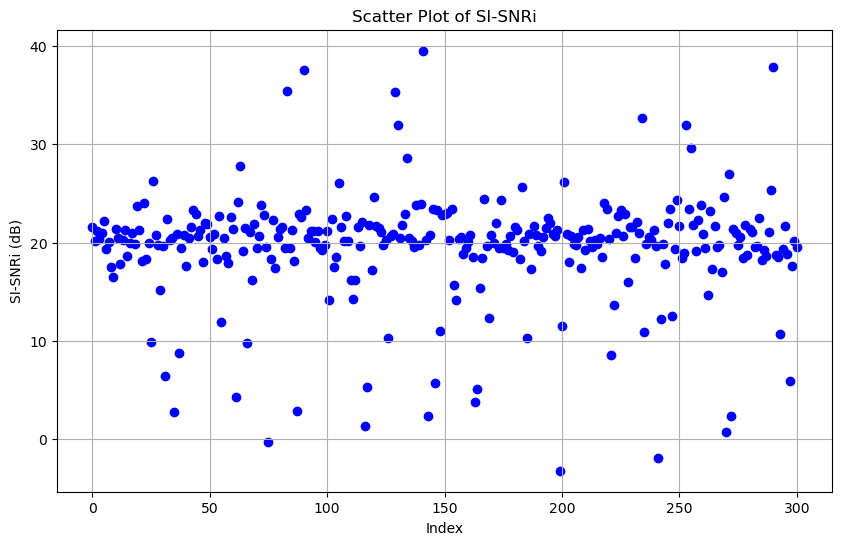

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['si-snr_i'], color='b', label='SI-SNRi')
plt.title('Scatter Plot of SI-SNRi')
plt.xlabel('Index')
plt.ylabel('SI-SNRi (dB)')
plt.grid(True)
plt.show()

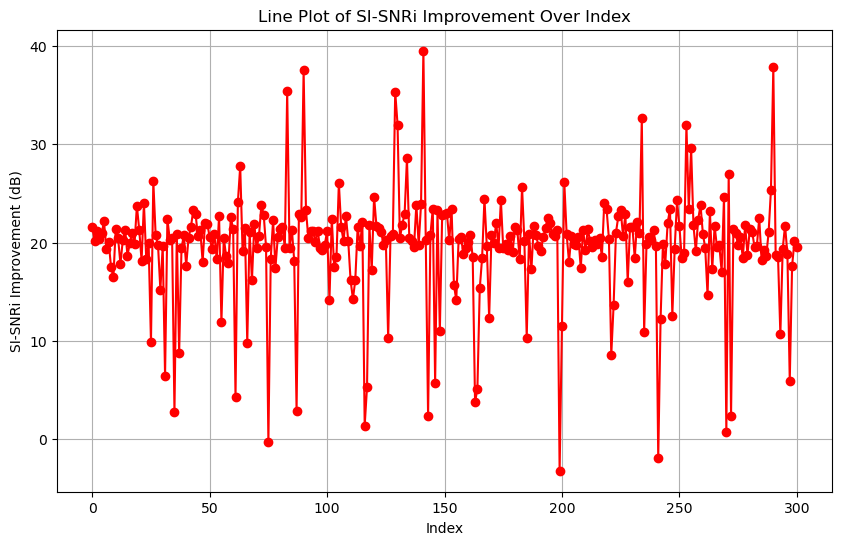

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['si-snr_i'], marker='o', linestyle='-', color='r', label='SI-SNRi Improvement')
plt.title('Line Plot of SI-SNRi Improvement Over Index')
plt.xlabel('Index')
plt.ylabel('SI-SNRi Improvement (dB)')
plt.grid(True)
plt.show()

In [91]:
# Áp dụng Moving Average để làm mượt dữ liệu
window_size = 5  # Số điểm trung bình động (có thể điều chỉnh)
df['si-snr_i_smoothed'] = df['si-snr_i'].rolling(window=window_size, min_periods=1).mean()

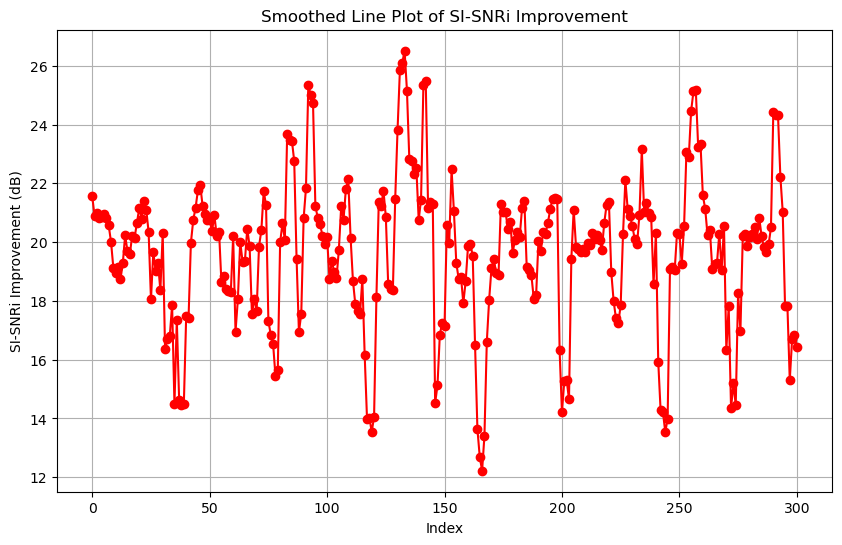

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['si-snr_i_smoothed'], marker='o', linestyle='-', color='r', label='Smoothed SI-SNRi Improvement')
plt.title('Smoothed Line Plot of SI-SNRi Improvement')
plt.xlabel('Index')
plt.ylabel('SI-SNRi Improvement (dB)')
plt.grid(True)
plt.show()

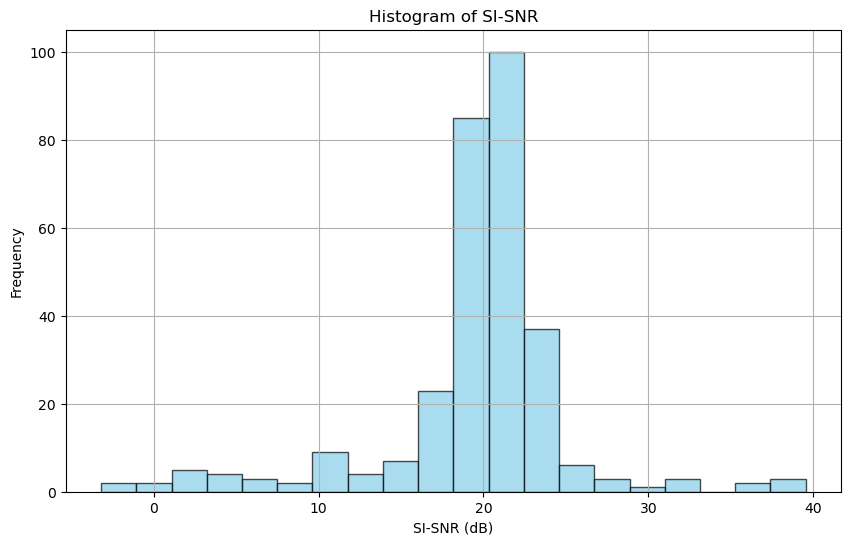

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(df['si-snr'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SI-SNR')
plt.xlabel('SI-SNR (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

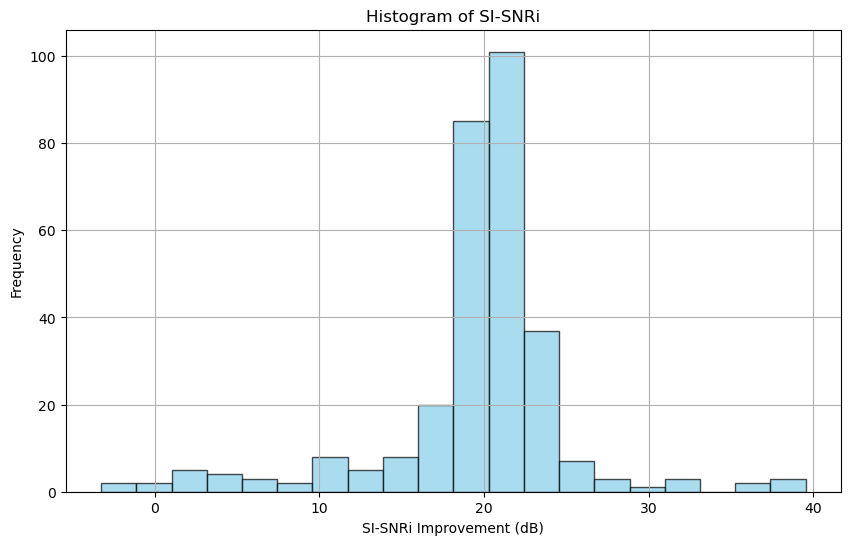

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(df['si-snr_i'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SI-SNRi')
plt.xlabel('SI-SNRi Improvement (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

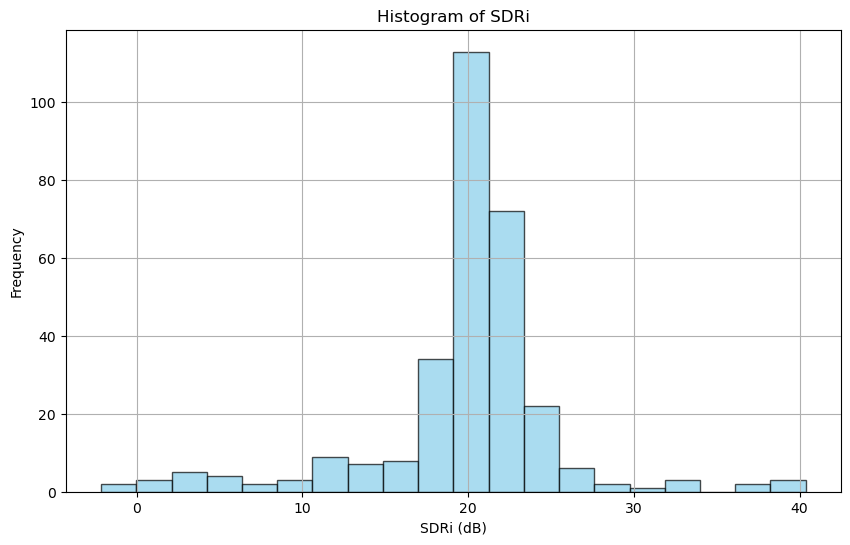

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(df['sdr_i'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of SDRi')
plt.xlabel('SDRi (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [96]:
# Heatmap hiển thị mối tương quan giữa các thông số
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()